## **Import Libraries**

In [71]:
import numpy as np # for linear algebra operation
import cv2 # for loading, visualizaing, and transforming image

import PIL # for image operation
import PIL.Image as Image # For loading and visualzing image

import os # To read the data from particular path

import matplotlib.pylab as plt # To visualize the data

import tensorflow as tf # Framework for machine learning models

from tensorflow import keras # Library under tensorflow framework
from tensorflow.keras import layers # Layers to build the model
from tensorflow.keras.models import Sequential # Sequential model :Type of machine learning model
import seaborn as sns # To plot the graph
import pandas as pd # For data cleaning and operation on dataframe
import random # To generate random numbers
import sklearn

In [11]:
import pathlib # For file path operation
data_dir = pathlib.Path("./final_dataset/") # Get all file path on specified location
data_dir

PosixPath('final_dataset')

## Read image files and convert it to csv

In [12]:
from matplotlib import path # File path operation
# Getting all the image paths of three classes in a dictonary
data_images_dict = {
    'Mask': list(data_dir.glob('**/mask/*')),
    'Improper Mask': list(data_dir.glob('**/improper_mask/*')),
    'Non Mask': list(data_dir.glob('**/no_mask/*'))
}

In [13]:
# Defining dictionary with class name respective 
data_labels_dict = {
    'Mask': 0,
    'Improper Mask': 1,
    'Non Mask': 2
}

In [14]:
# reading images from different directories of 3 classes and storing in the array with dict name as label
# resizing image into 224 x 224 x 3(RGB channels)
X, y = [], []

for image_name, images in data_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(data_labels_dict[image_name])

In [15]:
# converting list into np array
X = np.array(X)
y = np.array(y)

### Image to CSV

In [16]:
# Creating first element of dataframe so that others can be appended
df = pd.DataFrame(list(X[0].flatten())).T
df # df would be columns of pixels (224x224x3 = 150528)

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,197,213,226,197,213,226,197,213,226,197,...,217,187,204,217,187,204,217,187,204,217


In [17]:
# Appending every row as image flattened image pixels
for i in range(1,X.shape[0]):
    temp = pd.DataFrame(list(X[0].flatten())).T
    df = df.append(temp,ignore_index=True)

/var/folders/z9/j_vs5gs90ms3g2yx15bp7jcr0000kr/T/ipykernel_78405/802480516.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp,ignore_index=True)


In [18]:
df.shape # shape of the image, 8949 image with 150528 pixel values

(8949, 150528)

In [21]:
pd.DataFrame(y).to_csv('label.csv',index=False) # storing dataframe into csv

# Visualization

### Count plot of number of images in each class

In [64]:
sns.set(rc={'figure.figsize':(5,5)}) # setting image size

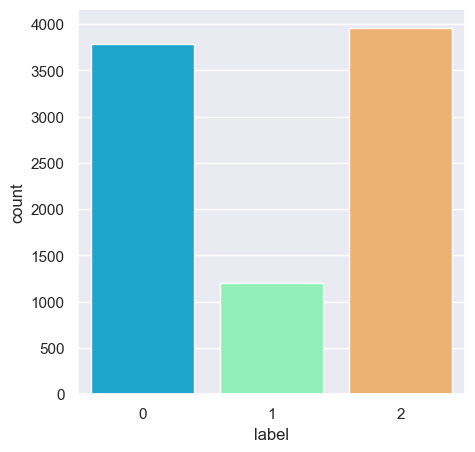

In [66]:
# count plot to check whether the data is balanced or not
ax = sns.countplot(x='label',data=df.replace({"label":{"0":"Mask","1":"Improper Mask","2":"Without Mask"}}),palette='rainbow')

## Visualize images from  different classes

In [77]:
# Genearting random 3 indexes from 3 classes to visualize the images
# https://stackoverflow.com/questions/56830995/find-the-indexes-of-unique-elements-of-a-list-in-python
start_index_of_unique_values = list(np.unique(list(y), return_index=True)[1]) 

random.seed(30)
randomImages = np.random.randint(27455, size=8)
image_indexs=[]
class0_images = list(np.random.randint(start_index_of_unique_values[0], start_index_of_unique_values[1],size=3))
class1_images = list(np.random.randint(start_index_of_unique_values[1], start_index_of_unique_values[2],size=3))
class2_images = list(np.random.randint(start_index_of_unique_values[2], len(y)-1,size=3))
image_indexs.append(class0_images)
image_indexs.append(class1_images)
image_indexs.append(class2_images)


In [79]:
from itertools import chain # to flatten list
# https://www.geeksforgeeks.org/python-ways-to-flatten-a-2d-list/
image_indexs_flatten = list(chain.from_iterable(image_indexs)) 
image_indexs_flatten

[1503, 2744, 2157, 4627, 4409, 4898, 7315, 8368, 7113]

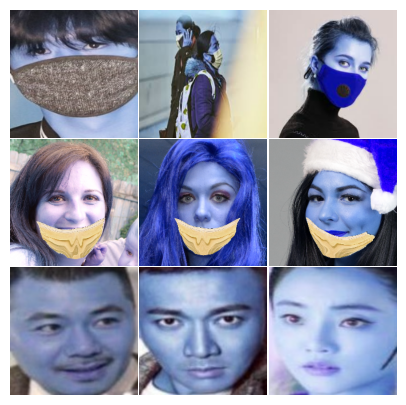

In [94]:
# plotting 3 images from each class: {Mask, improper mask, no mask}
fig, axes = plt.subplots(3, 3)
# axes.set_axis_off()
fig.set_size_inches(5, 5)
axes = axes.flatten()
for i in range(0,axes.shape[0]):
    axes[i].imshow(X[image_indexs_flatten[i]])
    axes[i].grid(False)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.005, hspace=0.005) # https://stackoverflow.com/questions/20057260/how-to-remove-gaps-between-subplots-in-matplotlib

## Different Normalization techniques

In [135]:
# Apply three different normalization technique on array on first image.

# Reference: https://towardsdatascience.com/data-preprocessing-and-network-building-in-cnn-15624ef3a28b
first_image = X[300]

normalized_first_image_arr = list()
# Min max normalization with min =0 and max=255
norm1_image = first_image/255
normalized_first_image_arr.append(norm1_image)

# Range normalization
norm2_image = first_image - np.min(first_image)/np.max(first_image) - np.min(first_image)
normalized_first_image_arr.append(norm2_image)

# Percentile normalization
norm3_image = first_image - np.percentile(first_image,5)/ np.percentile(first_image,95) - np.percentile(first_image,5)
normalized_first_image_arr.append(norm3_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


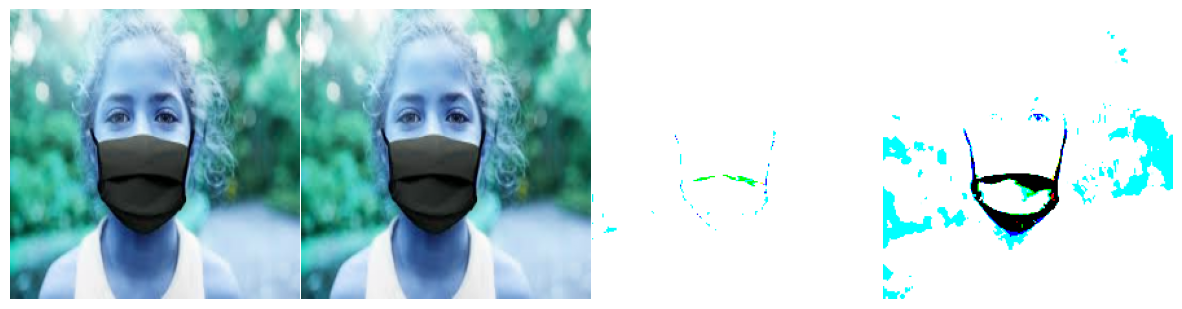

In [138]:
# Plotting applied normalized images
fig, axes = plt.subplots(1, 4)
fig.set_figwidth(15)
axes = axes.flatten()
axes[0].imshow(image)
axes[0].axis('off')
axes[0].grid(False)
axes = axes.flatten()
for i in range(1,axes.shape[0]):
    axes[i].imshow(normalized_first_image_arr[i-1])
    axes[i].grid(False)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.005, hspace=0.005) # https://stackoverflow.com/questions/20057260/how-to-remove-gaps-between-subplots-in-matplotlib

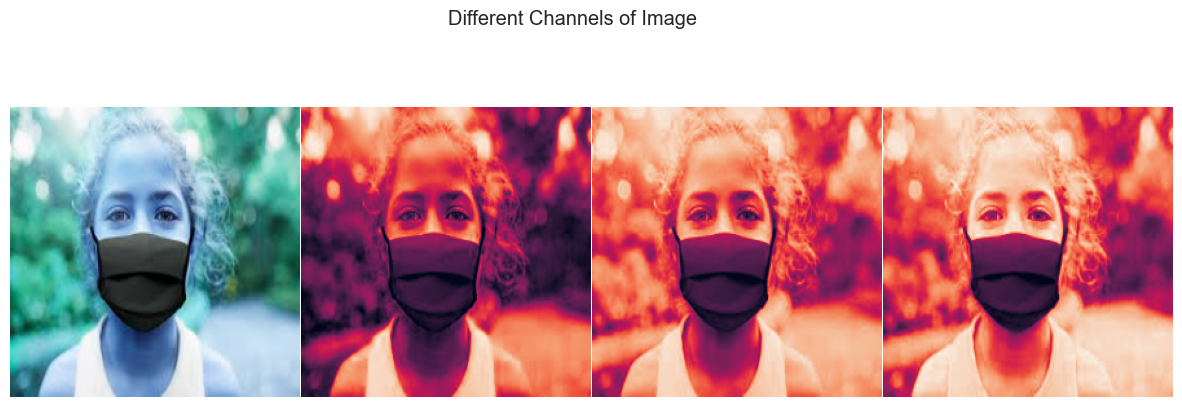

In [134]:
# plotting the original image and the RGB channels
image = X[300]
fig, axes = plt.subplots(1, 4)
fig.set_figwidth(15)
axes = axes.flatten()
axes[0].imshow(image)
axes[0].axis('off')
axes[0].grid(False)
for i in range(1,axes.shape[0]):
    axes[i].imshow(image[:, : , i-1])
    axes[i].grid(False)
    axes[i].axis('off')
    
fig.suptitle('Different Channels of Image')
plt.subplots_adjust(wspace=0.005, hspace=0.005) # https://stackoverflow.com/questions/20057260/how-to-remove-gaps-between-subplots-in-matplotlib

## Splitting dataset

In [7]:
from sklearn.model_selection import train_test_split # for splitting dataset
# split dataset into 80% train and 20% test with random state so for all the models this split remain same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Dataset normalize

In [8]:
# normalize the image by min max normalization
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [9]:
IMAGE_SHAPE=(224,224) # Defining image same

In [10]:
IMAGE_SHAPE+(3,) # adding number of channels into image shape

(224, 224, 3)

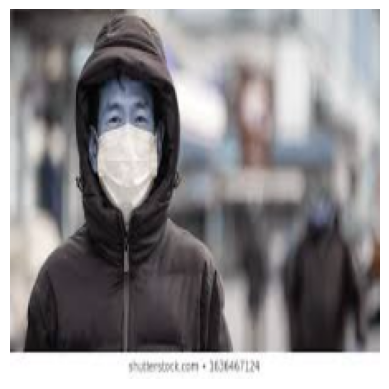

In [11]:
# Visualizing one of the images from dataset
plt.axis('off')
plt.imshow(X[500])

# Model training

## MobileNetV2

In [12]:
# Defining feature extraction layer with pre-trained mobilenetv2 on Imagenet 
# we have set average pooling and top was not taken as this will be used as feature extraction layer
# https://keras.io/api/applications/mobilenet/
pretrained_model_without_top_layer = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), alpha=1.0, include_top=False, weights='imagenet',
    input_tensor=None, pooling="avg")

In [13]:
# Freeze the weights of the mobilenetv2 layers (becuase pre-trained weights is capable of extracting rich feature)
for layers in pretrained_model_without_top_layer.layers:
  layers.trainable = False

In [14]:
num_of_classes = 3 # define number of classes

# defining sequential model with mobilenetv2 feature extraction layer and classification layers
mobilenetv2 = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(1000),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_of_classes)
])

mobilenetv2.summary() # print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 1000)              1281000   
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                        

In [15]:
# setting model hyper parameters
# Adam optimizer with 0.000001 learning rate
mobilenetv2.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.000001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [16]:
# defining checkpoint so that best model can be picked on later stage
weight_dir = "weights/50_epoch_mobilenetv2_more_layers_LR_LOW"
if not os.path.exists(weight_dir):
    os.mkdir(weight_dir)
    
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_dir+'/checkpoint-{epoch:02d}.hdf5')

In [17]:
# Training the model for 50 epoch, 20% validation split, 10 batch size
history = mobilenetv2.fit(X_train_scaled, y_train, epochs=50,callbacks=[checkpoint],validation_split=0.20,batch_size=10)

Epoch 1/50


2022-12-06 21:30:05.939908: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


573/573 [==============================] - 64s 108ms/step - loss: 1.1060 - acc: 0.5469 - val_loss: 0.6080 - val_acc: 0.7605
Epoch 2/50
573/573 [==============================] - 55s 96ms/step - loss: 0.7376 - acc: 0.6964 - val_loss: 0.3939 - val_acc: 0.8527
Epoch 3/50
573/573 [==============================] - 57s 99ms/step - loss: 0.5535 - acc: 0.7770 - val_loss: 0.2835 - val_acc: 0.8925
Epoch 4/50
573/573 [==============================] - 62s 108ms/step - loss: 0.4618 - acc: 0.8168 - val_loss: 0.2263 - val_acc: 0.9134
Epoch 5/50
573/573 [==============================] - 59s 103ms/step - loss: 0.3995 - acc: 0.8430 - val_loss: 0.1891 - val_acc: 0.9316
Epoch 6/50
573/573 [==============================] - 60s 105ms/step - loss: 0.3750 - acc: 0.8552 - val_loss: 0.1632 - val_acc: 0.9434
Epoch 7/50
573/573 [==============================] - 58s 102ms/step - loss: 0.3253 - acc: 0.8752 - val_loss: 0.1395 - val_acc: 0.9518
Epoch 8/50
573/573 [==============================] - 57s 100ms/step

In [18]:
# Evaluate model performance on unseen (Test/ Holdout) dataset
mobilenetv2.evaluate(X_test_scaled,y_test)

56/56 [==============================] - 13s 228ms/step - loss: 0.0454 - acc: 0.9866


[0.04535973444581032, 0.986592173576355]

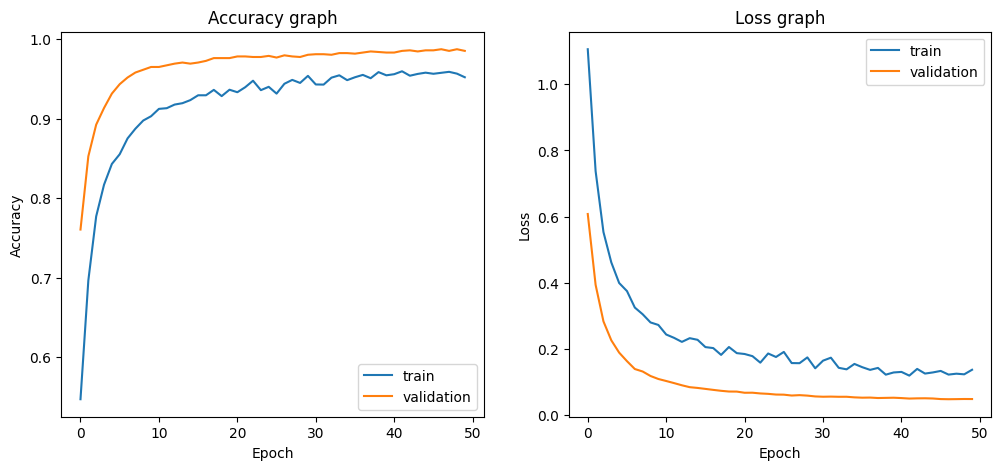

In [19]:
# Plotting training and validation aacuracy
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set_title('Accuracy graph')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['train','validation'])

# Plotting training and validation loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Loss graph')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['train','validation'])

plt.show()

In [20]:
# predicting class for one image
mobilenetv2.predict(X_test_scaled[0].reshape(1,224,224,3)) # it can be seen that probability of class 2 is high which is true

1/1 [==============================] - 1s 545ms/step


array([[-5.214947  , -0.43651056,  8.767827  ]], dtype=float32)

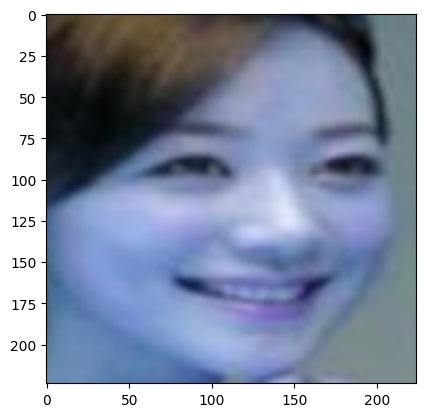

In [21]:
plt.imshow(X_test[0]) # visualize the tested image

In [22]:
y_test[0] # true classes of tested image

2

In [25]:
# Converting model history information into dataframe
h = pd.DataFrame(history.history)

In [26]:
# saving history file so that it can used to compare the models at last
h.to_csv('history_mobilenetv2_more_layer_50_epoch.csv')

In [90]:
# Loading the model of last epoch 
mobilenetv2 = keras.models.load_model("./weights/50_epoch_mobilenetv2_more_layers_LR_LOW/checkpoint-50.hdf5")

In [92]:
y_pred_mobilenetv2 = mobilenetv2.predict(X_test_scaled) # predicting class for test image

56/56 [==============================] - 12s 199ms/step


In [93]:
# converting probability output into classes 
# Assigning class which has highest probability
new_y_pred_mobilenetv2 = []
for i in y_pred_mobilenetv2:
    i=list(i)
    max_value = max(i)
    index = i.index(max_value)
    new_y_pred_mobilenetv2.append(index)

In [94]:
# classification report
classification_report_mobilenetv2 = sklearn.metrics.classification_report(y_test, new_y_pred_mobilenetv2)
print(classification_report_mobilenetv2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       747
           1       0.98      1.00      0.99       250
           2       0.99      0.99      0.99       793

    accuracy                           0.99      1790
   macro avg       0.99      0.99      0.99      1790
weighted avg       0.99      0.99      0.99      1790



In [95]:
# confusion matrix
np.set_printoptions(suppress=True)
confusion_matrix_mobilenetv2 = sklearn.metrics.confusion_matrix(y_test, new_y_pred_mobilenetv2)
print(confusion_matrix)                

[[523  50 174]
 [ 11 232   7]
 [120  44 629]]


<AxesSubplot: >

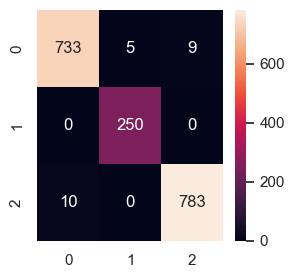

In [96]:
# Visualizing confusion matrix
sns.set(rc = {'figure.figsize':(3,3)})
sns.heatmap(confusion_matrix_mobilenetv2, annot=True,fmt='g')

## Resnet50

In [12]:
# Defining feature extraction layer with pre-trained resnet50 on Imagenet 
# we have set average pooling and top was not taken as this will be used as feature extraction layer
# https://faroit.com/keras-docs/1.2.0/applications/
pretrained_model_without_top_layer = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),include_top=False, weights='imagenet',
    input_tensor=None, pooling="avg")

In [13]:
# Freeze the weights of the mobilenetv2 layers (becuase pre-trained weights is capable of extracting rich feature)
for layers in pretrained_model_without_top_layer.layers:
  layers.trainable = False

In [14]:
num_of_classes = 3 # define number of classes

# defining sequential model with resnet50 feature extraction layer and classification layers
resnet50 = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(1000),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_of_classes)
])

resnet50.summary()  # print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 1000)              2049000   
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0

In [15]:
# setting model hyper parameters
# Adam optimizer with 0.000001 learning rate
resnet50.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.000001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [16]:
# defining checkpoint so that best model can be picked on later stage
weight_dir = "weights/50_epoch_Resnet50"
if not os.path.exists(weight_dir):
    os.mkdir(weight_dir)
    
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_dir+'/checkpoint-{epoch:02d}.hdf5')

In [ ]:
# Training the model for 50 epoch, 20% validation split, 10 batch size
history = resnet50.fit(X_train_scaled, y_train, epochs=50,callbacks=[checkpoint],validation_split=0.20,batch_size=10)

Epoch 1/50


2022-12-07 12:43:41.228576: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


573/573 [==============================] - 294s 505ms/step - loss: 1.4658 - acc: 0.3906 - val_loss: 1.2658 - val_acc: 0.4330
Epoch 2/50
573/573 [==============================] - 318s 555ms/step - loss: 1.3284 - acc: 0.4243 - val_loss: 1.1299 - val_acc: 0.5175
Epoch 3/50
573/573 [==============================] - 366s 639ms/step - loss: 1.2488 - acc: 0.4472 - val_loss: 1.0555 - val_acc: 0.5489
Epoch 4/50
573/573 [==============================] - 385s 672ms/step - loss: 1.2143 - acc: 0.4823 - val_loss: 0.9456 - val_acc: 0.6054
Epoch 5/50
573/573 [==============================] - 463s 808ms/step - loss: 1.1768 - acc: 0.4948 - val_loss: 0.9896 - val_acc: 0.5754
Epoch 6/50
573/573 [==============================] - 412s 720ms/step - loss: 1.1585 - acc: 0.4989 - val_loss: 0.9627 - val_acc: 0.5943
Epoch 7/50
573/573 [==============================] - 353s 617ms/step - loss: 1.1472 - acc: 0.5142 - val_loss: 0.9354 - val_acc: 0.5943
Epoch 8/50
573/573 [==============================] - 384s 

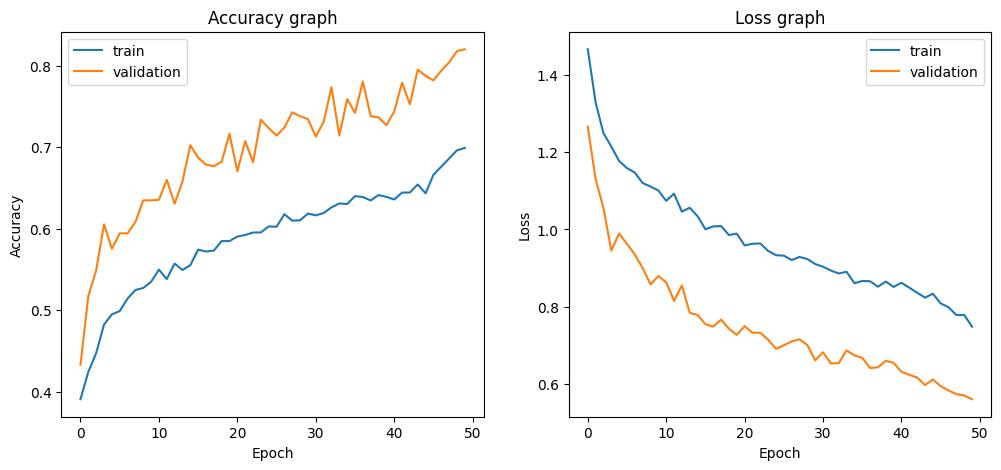

In [25]:
# Plotting training and validation accuracy
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].plot(resnet50_history['accuracy'])
axs[0].plot(resnet50_history['val_accuracy'])
axs[0].set_title('Accuracy graph')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['train','validation'])

# Plotting training and validation loss
axs[1].plot(resnet50_history['loss'])
axs[1].plot(resnet50_history['val_loss'])
axs[1].set_title('Loss graph')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['train','validation'])

plt.show()

In [106]:
# Evaluate model performance on unseen (Test/ Holdout) dataset
y_pred_resnet50 = resnet50.evaluate(X_test_scaled,y_test)

56/56 [==============================] - 57s 1s/step - loss: 0.6068 - acc: 0.7732


In [ ]:
# Converting model history information into dataframe
h = pd.DataFrame(history.history)

In [ ]:
# saving history file so that it can used to compare the models at last
h.to_csv('resnet_history.csv')

In [105]:
# Loading the model of last epoch 
resnet50 = keras.models.load_model("./weights/50_epoch_Resnet50/checkpoint-50.hdf5")

In [107]:
y_pred_resnet50 = resnet50.predict(X_test_scaled) # predicting class for test image

56/56 [==============================] - 62s 1s/step


In [108]:
# converting probability output into classes 
# Assigning class which has highest probability
new_y_pred_resnet50 = []
for i in y_pred_resnet50:
    i=list(i)
    max_value = max(i)
    index = i.index(max_value)
    new_y_pred_resnet50.append(index)

In [109]:
# classification report
classification_report_resnet50 = sklearn.metrics.classification_report(y_test, new_y_pred_resnet50) # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report_resnet50)

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       747
           1       0.71      0.93      0.81       250
           2       0.78      0.79      0.78       793

    accuracy                           0.77      1790
   macro avg       0.76      0.81      0.78      1790
weighted avg       0.78      0.77      0.77      1790



In [110]:
# confusion matrix
np.set_printoptions(suppress=True)
confusion_matrix_resnet50 = sklearn.metrics.confusion_matrix(y_test, new_y_pred_resnet50) #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print(confusion_matrix)                

[[523  50 174]
 [ 11 232   7]
 [120  44 629]]


<AxesSubplot: >

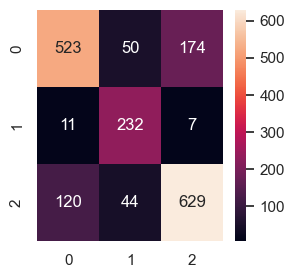

In [111]:
# Visualizing confusion matrix
sns.heatmap(confusion_matrix_resnet50, annot=True,fmt='g')

## Inception v3

In [12]:
# Defining feature extraction layer with pre-trained Inceptionv3 on Imagenet 
# we have set average pooling and top was not taken as this will be used as feature extraction layer
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3
pretrained_model_without_top_layer = tf.keras.applications.inception_v3.InceptionV3(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet',
    input_tensor=None, pooling="avg")

In [13]:
# Freeze the weights of the mobilenetv2 layers (becuase pre-trained weights is capable of extracting rich feature)
for layers in pretrained_model_without_top_layer.layers:
  layers.trainable = False

In [14]:
num_of_classes = 3 # define number of classes

# defining sequential model with resnet50 feature extraction layer and classification layers
inceptionv3 = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(1000),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_of_classes)
])

inceptionv3.summary() # print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 1000)              2049000   
                                                                 
 batch_normalization_94 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 batch_normalization_95 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0

In [15]:
# setting model hyper parameters
# Adam optimizer with 0.000001 learning rate
inceptionv3.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [16]:
# defining checkpoint so that best model can be picked on later stage
weight_dir = "weights/50_epoch_inceptionv3"
if not os.path.exists(weight_dir):
    os.mkdir(weight_dir)
    
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=weight_dir+'/checkpoint-{epoch:02d}.hdf5')

In [17]:
# Training the model for 50 epoch, 20% validation split, 10 batch size
history = inceptionv3.fit(X_train_scaled, y_train, epochs=50,callbacks=[checkpoint],validation_split=0.20,batch_size=10)

2022-12-07 09:11:19.347266: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50
573/573 [==============================] - 177s 299ms/step - loss: 0.2948 - acc: 0.9300 - val_loss: 0.2209 - val_acc: 0.9302
Epoch 2/50
573/573 [==============================] - 184s 321ms/step - loss: 0.1373 - acc: 0.9534 - val_loss: 0.0991 - val_acc: 0.9637
Epoch 3/50
573/573 [==============================] - 189s 330ms/step - loss: 0.1132 - acc: 0.9632 - val_loss: 0.0684 - val_acc: 0.9777
Epoch 4/50
573/573 [==============================] - 195s 341ms/step - loss: 0.1055 - acc: 0.9656 - val_loss: 0.1256 - val_acc: 0.9644
Epoch 5/50
573/573 [==============================] - 193s 336ms/step - loss: 0.1071 - acc: 0.9632 - val_loss: 0.1287 - val_acc: 0.9644
Epoch 6/50
573/573 [==============================] - 207s 362ms/step - loss: 0.1009 - acc: 0.9675 - val_loss: 0.0767 - val_acc: 0.9797
Epoch 7/50
573/573 [==============================] - 243s 424ms/step - loss: 0.0943 - acc: 0.9661 - val_loss: 0.0761 - val_acc: 0.9825
Epoch 8/50
573/573 [============================

In [18]:
inceptionv3.evaluate(X_test_scaled,y_test) # Evaluate model performance on unseen (Test/ Holdout) dataset

56/56 [==============================] - 54s 965ms/step - loss: 0.0734 - acc: 0.9821


[0.07336793839931488, 0.9821228981018066]

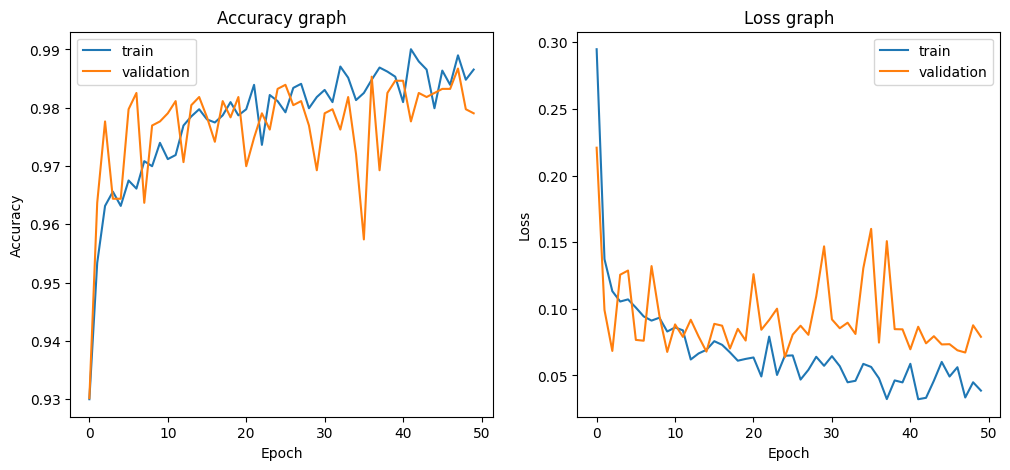

In [19]:
# Plotting training and validation accuracy
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].plot(history.history['acc'])
axs[0].plot(history.history['val_acc'])
axs[0].set_title('Accuracy graph')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['train','validation'])

# Plotting training and validation loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Loss graph')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(['train','validation'])

plt.show()

In [21]:
# predicting class for one image
inceptionv3.predict(X_test_scaled[0].reshape(1,224,224,3))

1/1 [==============================] - 1s 797ms/step


array([[ -3.4782634, -14.267399 ,  13.3852215]], dtype=float32)

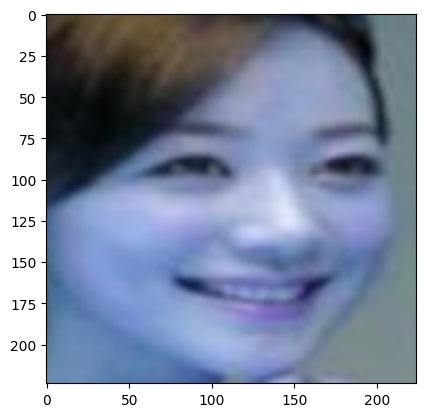

In [22]:
# visualize the tested image
plt.imshow(X_test[0])

In [23]:
y_test[0] # true classes of tested image

2

In [ ]:
# Converting model history information into dataframe
h = pd.DataFrame(history.history)

In [ ]:
# saving history file so that it can used to compare the models at last
h.to_csv("inception_history.csv")

In [97]:
# Loading the model of last epoch 
inceptionv3 = keras.models.load_model("./weights/50_epoch_inceptionv3/checkpoint-50.hdf5")

In [99]:
y_pred_inceptionv3 = inceptionv3.predict(X_test_scaled) # predicting class for test image

56/56 [==============================] - 40s 707ms/step


In [100]:
# converting probability output into classes 
# Assigning class which has highest probability
new_y_pred_inceptionv3 = []
for i in y_pred_inceptionv3:
    i=list(i)
    max_value = max(i)
    index = i.index(max_value)
    new_y_pred_inceptionv3.append(index)

In [101]:
# classification report
classification_report_inceptionv3 = sklearn.metrics.classification_report(y_test, new_y_pred_inceptionv3)
print(classification_report_inceptionv3)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       747
           1       0.99      0.98      0.98       250
           2       0.97      1.00      0.98       793

    accuracy                           0.98      1790
   macro avg       0.98      0.98      0.98      1790
weighted avg       0.98      0.98      0.98      1790



In [102]:
# confusion matrix
np.set_printoptions(suppress=True)
confusion_matrix_inceptionv3 = sklearn.metrics.confusion_matrix(y_test, new_y_pred_inceptionv3)
print(confusion_matrix_inceptionv3)                

[[724   2  21]
 [  2 244   4]
 [  3   0 790]]


<AxesSubplot: >

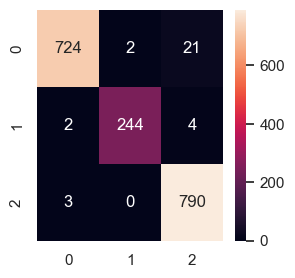

In [103]:
# Visualizing confusion matrix
sns.heatmap(confusion_matrix_inceptionv3, annot=True,fmt='g')

# Comparison of three models

In [2]:
# Reading history files of all three models
mobileNetv2_history = pd.read_csv("history_mobilenetv2_more_layer_50_epoch.csv")
resnet50_history = pd.read_csv("resnet_history.csv")
inceptionv3_history = pd.read_csv("inception_history.csv")

In [20]:
# printing types of all history files
print(type(mobileNetv2_history))
print(type(resnet50_history))
print(type(inceptionv3_history))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


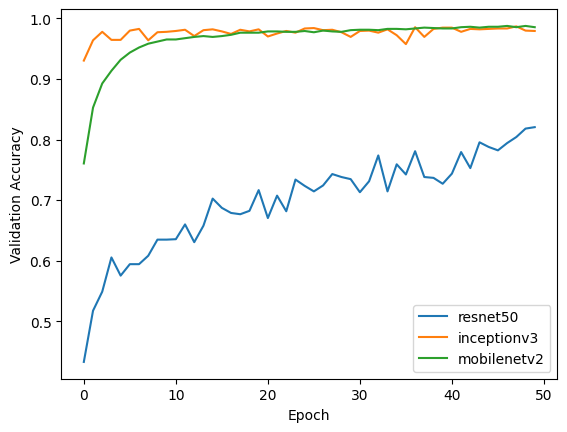

In [33]:
# plotting validation accuracy of all three mdoels so that better model can be identified
plt.plot(resnet50_history['val_accuracy'])
plt.plot(inceptionv3_history['val_accuracy'])
plt.plot(mobileNetv2_history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['resnet50','inceptionv3','mobilenetv2'])

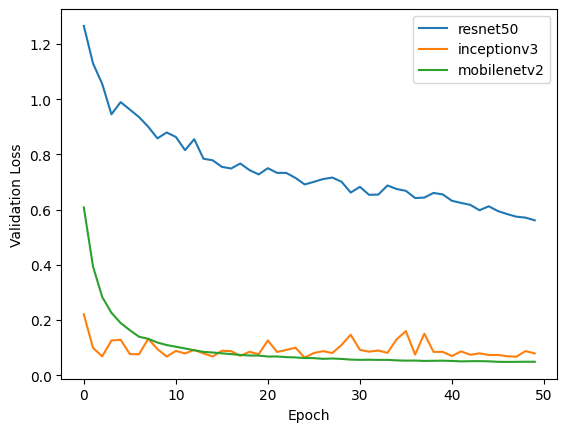

In [34]:
# plotting validation loss of all three mdoels so that better model can be identified
# Loss is also vital factor while choosing the good model for the problem
plt.plot(resnet50_history['val_loss'])
plt.plot(inceptionv3_history['val_loss'])
plt.plot(mobileNetv2_history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['resnet50','inceptionv3','mobilenetv2'])

## T test (statastical testing)

In [35]:
from scipy.stats import ttest_ind # import library for performing a  ttest

In [38]:
# T test for mobilenetv2 and inceptionv3
ttest,pvalue = ttest_ind(inceptionv3_history["val_accuracy"],mobileNetv2_history["val_acc"]) # T-test calculation

In [39]:
float(str(pvalue))

0.06732627589539593

In [45]:
print("PValue %0.5f" % (pvalue))

PValue 0.06733


In [41]:
# T test for inceptionv3 and mobilenetv2
ttest_ind(inceptionv3_history["val_accuracy"],mobileNetv2_history["val_acc"]) # T-test calculation

Ttest_indResult(statistic=1.850002853542122, pvalue=0.06732627589539593)

In [44]:
# T test for inceptionv3 and resnet50
ttest_ind(resnet50_history["val_accuracy"],inceptionv3_history["val_accuracy"]) # T-test calculation

Ttest_indResult(statistic=-24.21995983228707, pvalue=3.728317195051443e-43)

In [43]:
# T test for resnet50 and mobilenetv2
ttest_ind(resnet50_history["val_accuracy"],mobileNetv2_history["val_acc"]) # T-test calculation

Ttest_indResult(statistic=-21.1400123071606, pvalue=2.7407818858658997e-38)